In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Exploratory Data Analysis (EDA):

In [4]:
df.shape

(32560, 15)

In [5]:
#checking for columns
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
#checking for data type
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
#checking for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### There are no null values in the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Dataset contains 6 intiger and 9 object type.

### Statistical Summary:

In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


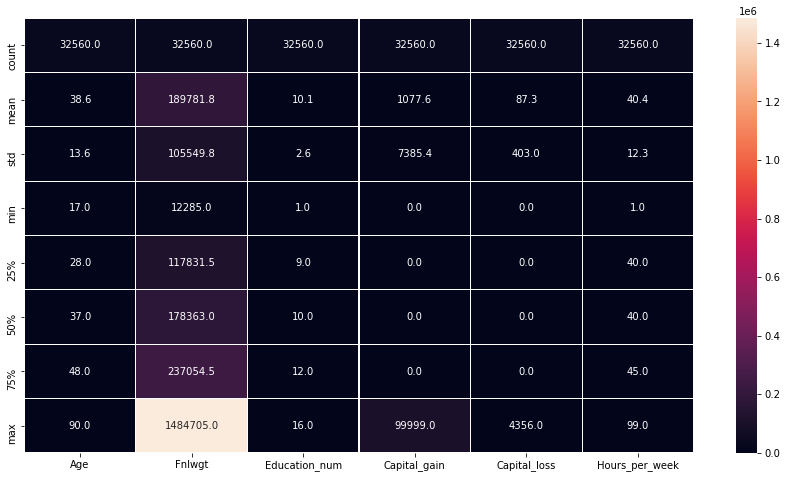

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

#### mean is more than 50% in all the columns.Outliers are present in all columns

## Analyzing the Target variable

In [11]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [12]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

#### Distribution in this column is unbalanced

#### Identifying the Categorical Columns

In [13]:
df.dtypes[df.dtypes == 'object']

Workclass         object
Education         object
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Native_country    object
Income            object
dtype: object

#### checking numerical columns

In [14]:
df.dtypes[df.dtypes == 'int64']

Age               int64
Fnlwgt            int64
Education_num     int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
dtype: object

### Analyzing the Categorical columns

In [15]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [16]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [17]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [18]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [19]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [20]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [21]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [22]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [23]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

# Data Preprocessing

In [24]:
df['Workclass'] = df['Workclass'].replace({'?':'Private'})

In [25]:
df['Native_country'] = df['Native_country'].replace({'?':'United-States'})

In [26]:
df['Occupation'] = df['Occupation'].replace({'?':'Prof-specialty '})

# Feature Engineering:

In [27]:
df.Education=df.Education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'Primary-school')
df.Education=df.Education.replace(['HS-grad','Prof-school'],'Higher-school')
df.Education=df.Education.replace(['Some-college','Assoc-voc','Assoc-acdm'],'secondary-school')
df.Education=df.Education.replace(['bachelors'],'Granduation')
df.Education=df.Education.replace(['Masters'],'Masters')
df.Education=df.Education.replace(['Doctorate'],'Post_graduation')

In [28]:
df.Marital_status=df.Marital_status.replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')
df.Marital_status=df.Marital_status.replace(['Never-married'],'Single')
df.Marital_status=df.Marital_status.replace(['Dicorced','Widowed','Separated'],'Others')

In [29]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [30]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

# Data Visualization:

<AxesSubplot:xlabel='Income', ylabel='count'>

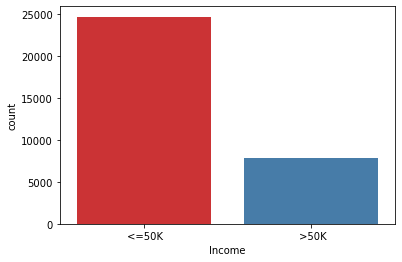

In [31]:
sns.countplot(df['Income'], palette="Set1")

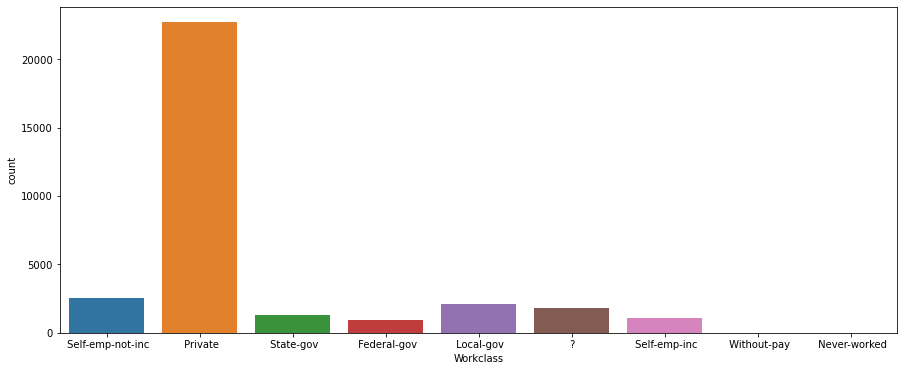

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(df['Workclass'])
plt.show()

#### Majority of the people belong to Private Workclass.

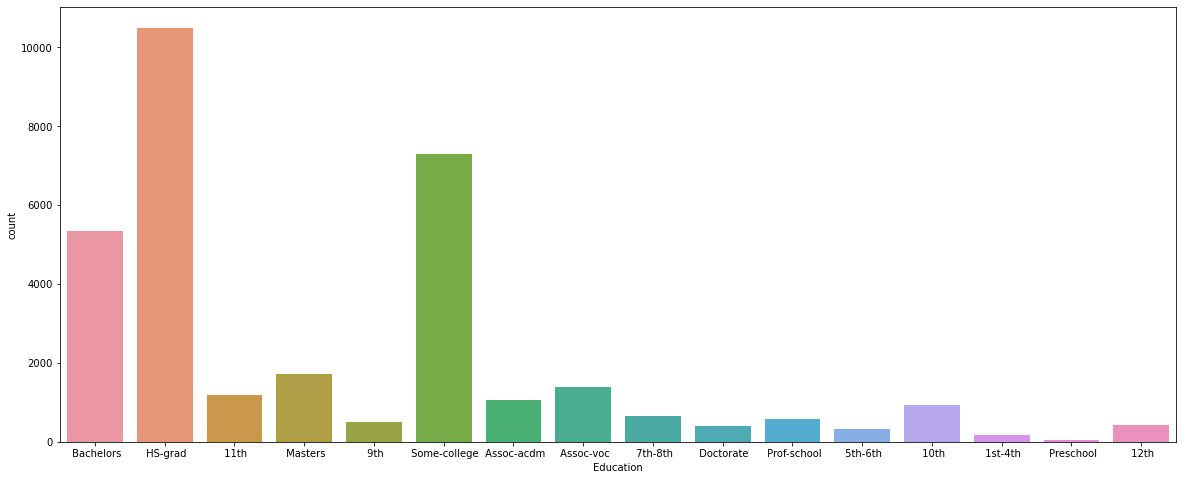

In [33]:
plt.figure(figsize=(20,8))
sns.countplot(df['Education'])
plt.show()

#### Majority of people are High scool graduates followed by Bachelors and those having attended some college.

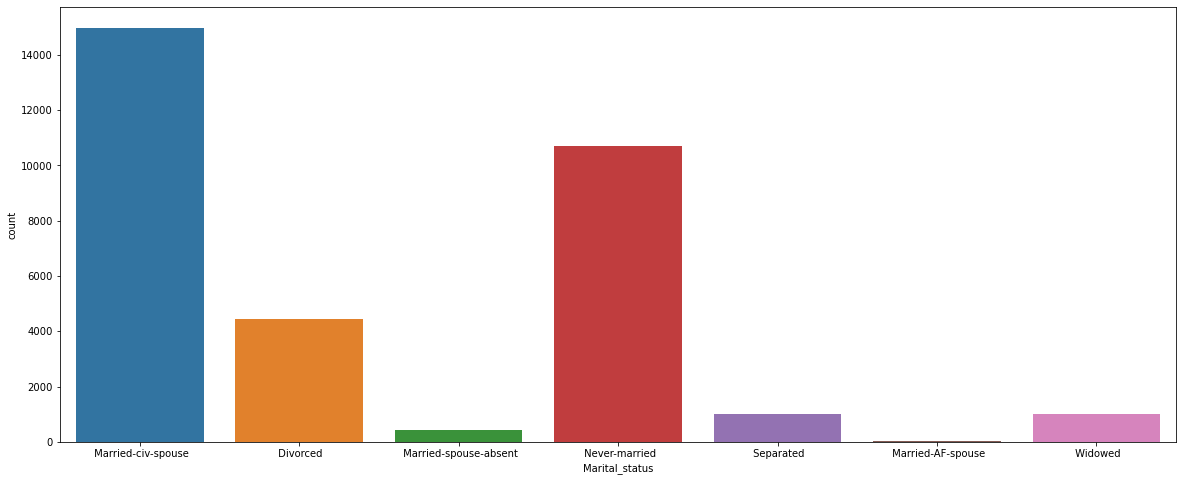

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(df['Marital_status'])
plt.show()

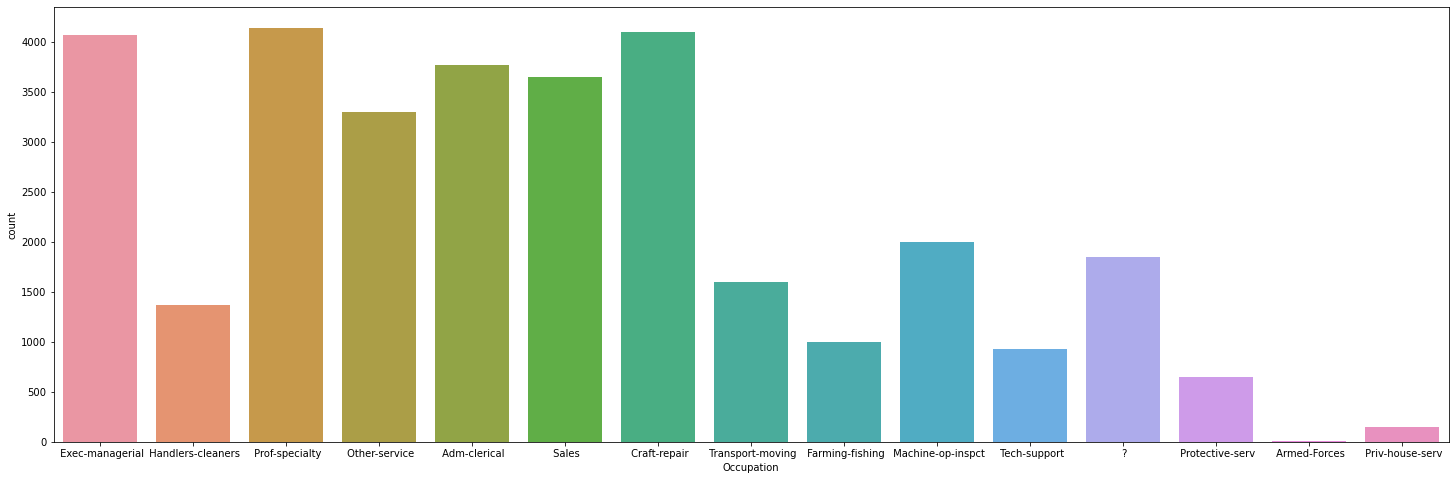

In [35]:
plt.figure(figsize=(25,8))
sns.countplot(df['Occupation'])
plt.show()

#### Exec-manegerial,Prof-speciality,Other-service,Adm-clerical,sales and Craft-repair are most common occupations.

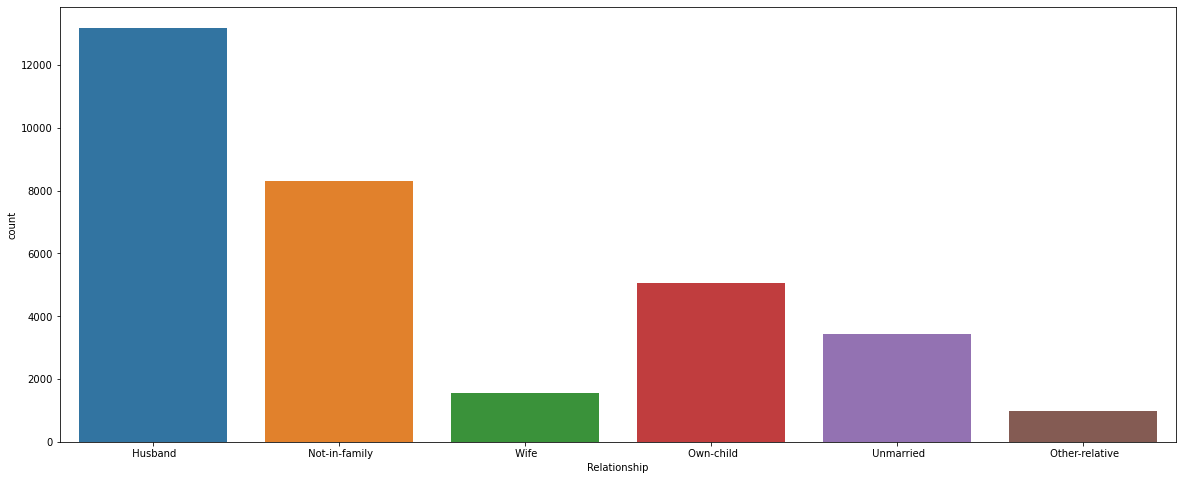

In [36]:
plt.figure(figsize=(20,8))
sns.countplot(df['Relationship'])
plt.show()

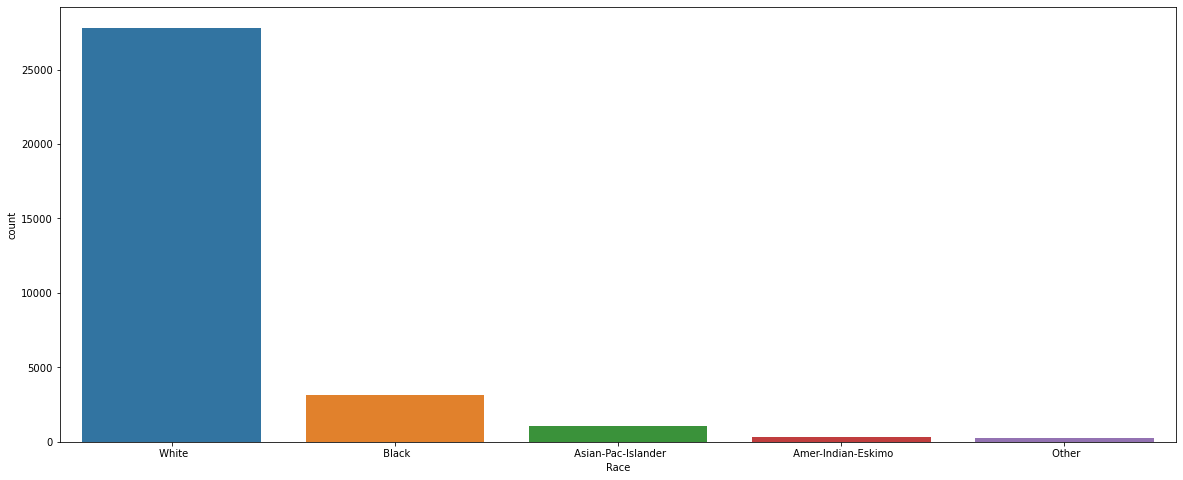

In [37]:
plt.figure(figsize=(20,8))
sns.countplot(df['Race'])
plt.show()

#### Whites form the majority.

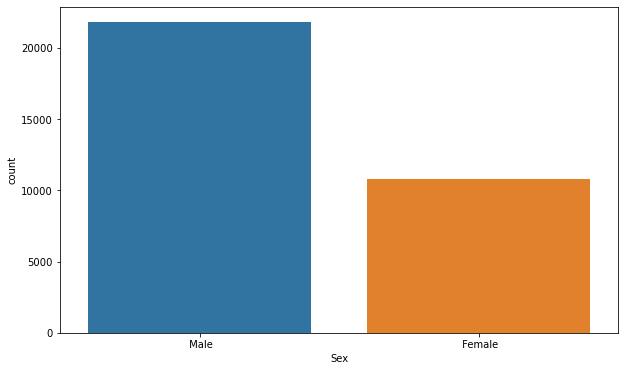

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(df['Sex'])
plt.show()

#### Males form maority.

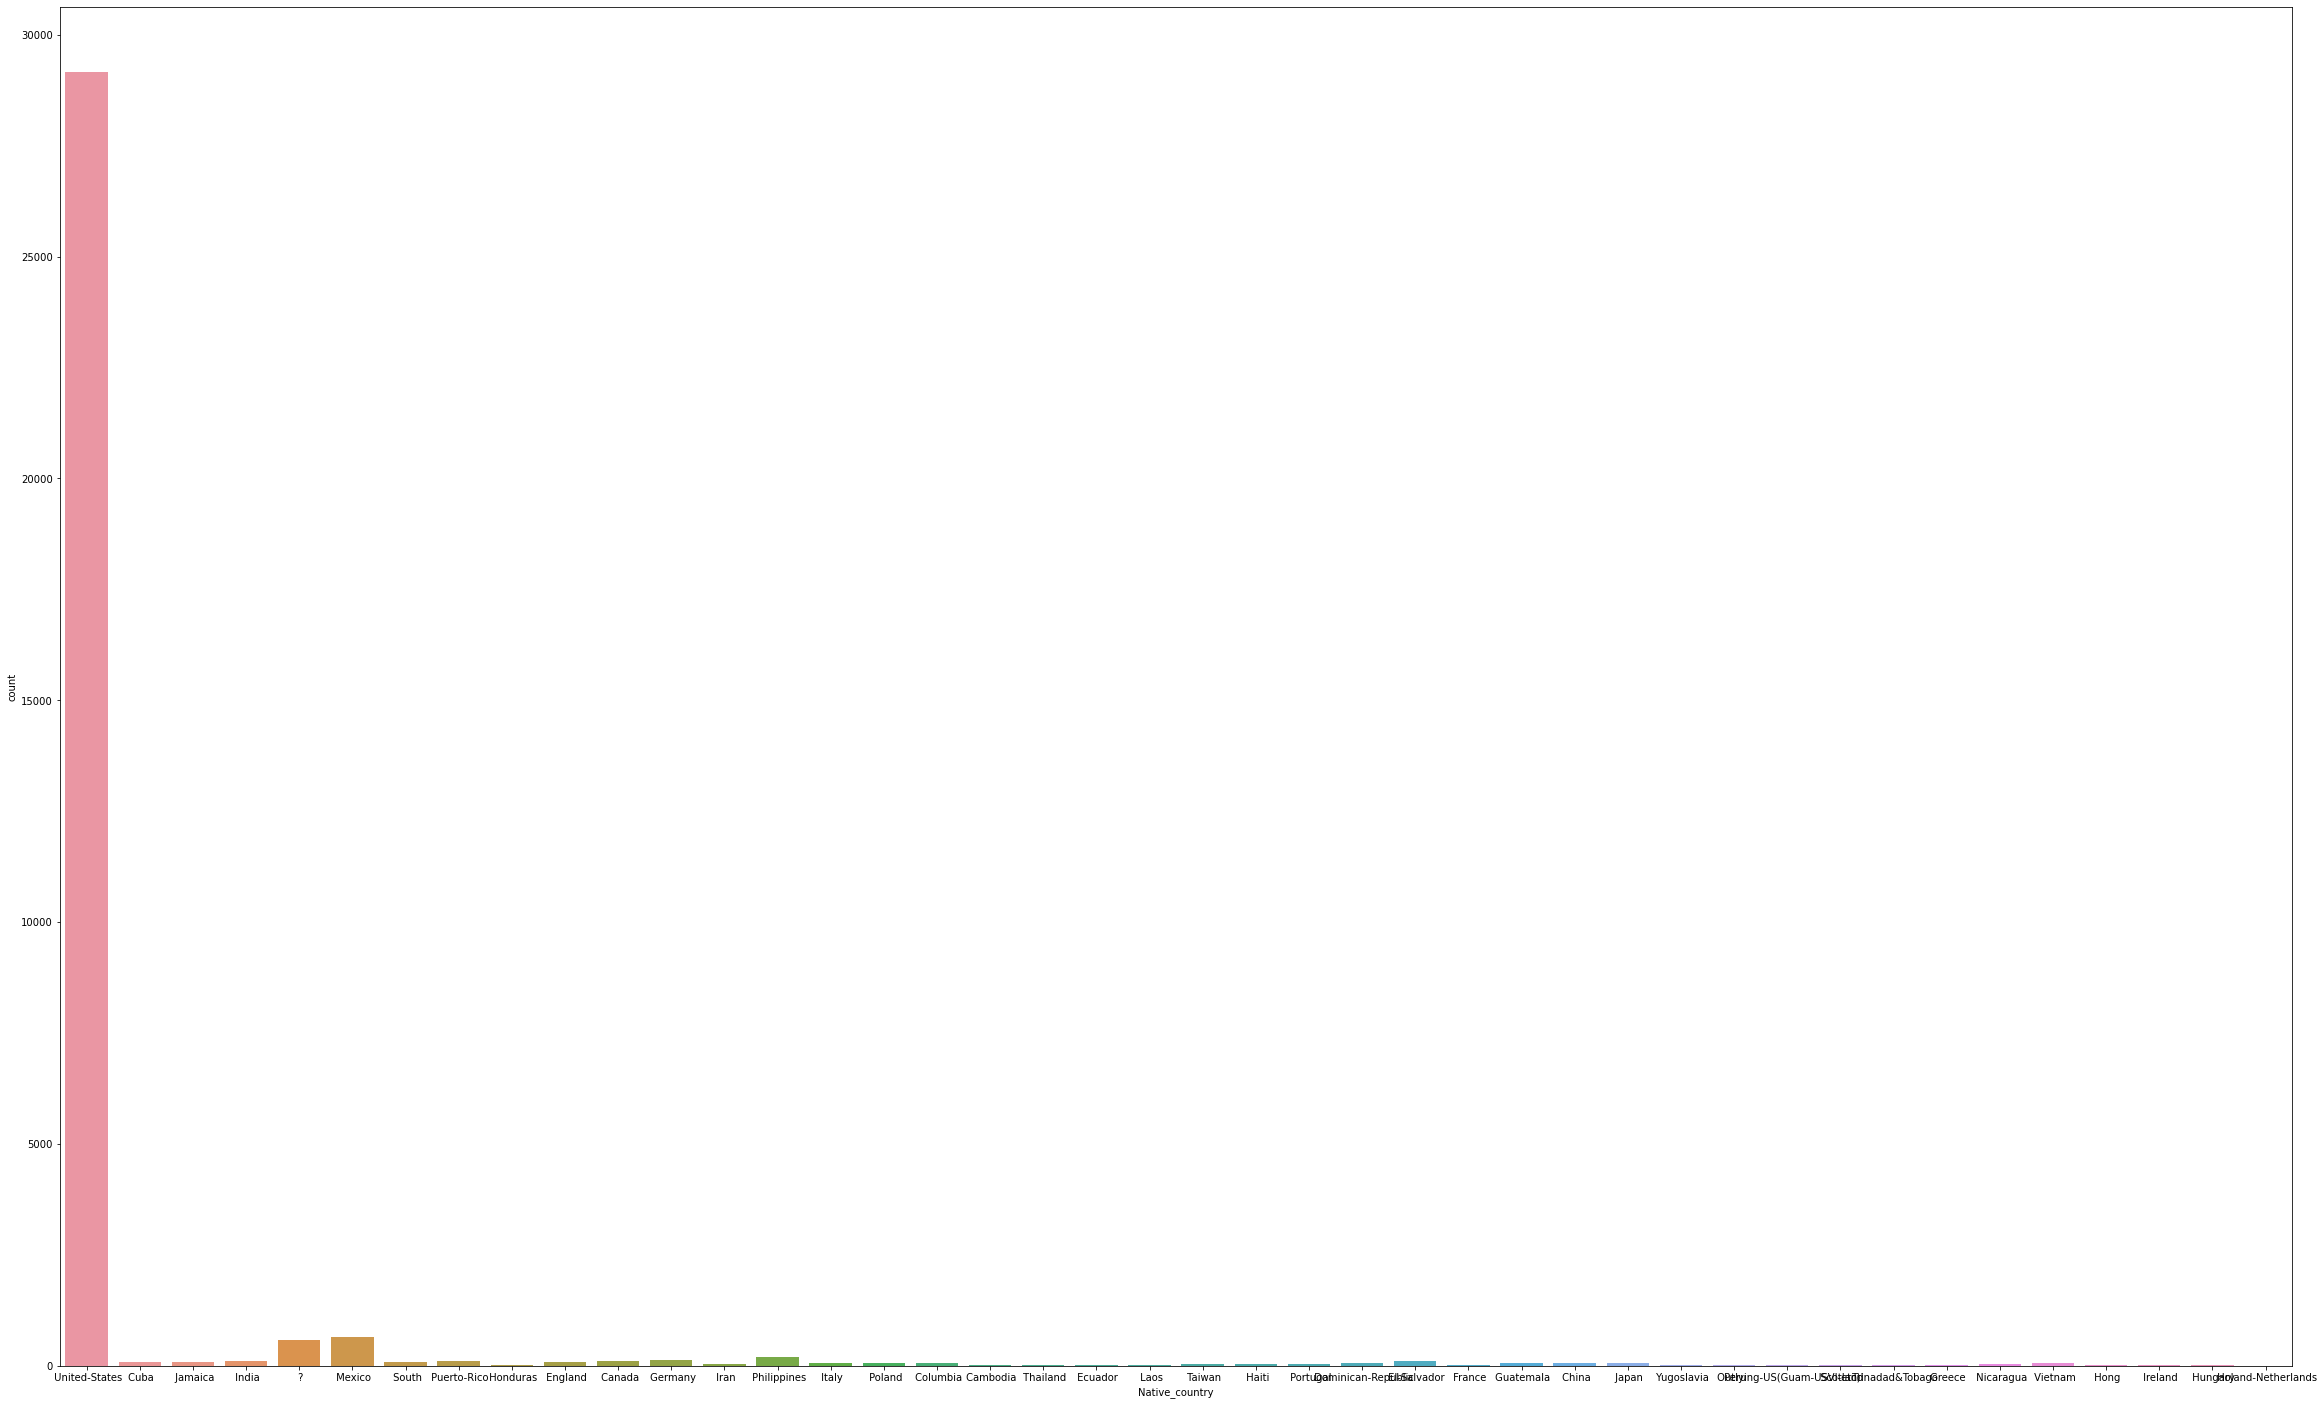

In [39]:
plt.figure(figsize=(40,25))
sns.countplot(df['Native_country'])
plt.show()

#### Majority of the people are natives of United States.

In [40]:
df.dtypes[df.dtypes == 'int64']

Age               int64
Fnlwgt            int64
Education_num     int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
dtype: object

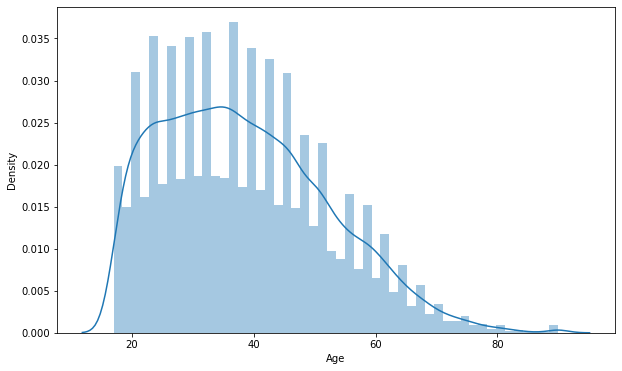

In [41]:
plt.figure(figsize=(10,6))
sns.distplot(df['Age'])
plt.show()

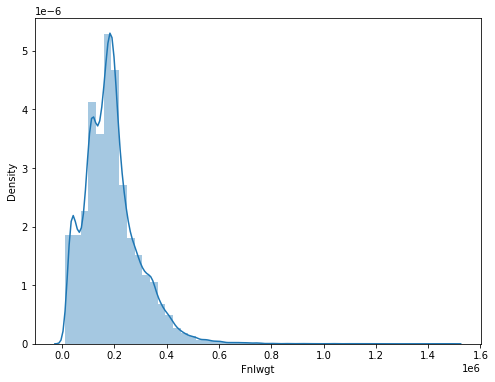

In [42]:
plt.figure(figsize=(8,6))
sns.distplot(df['Fnlwgt'])
plt.show()

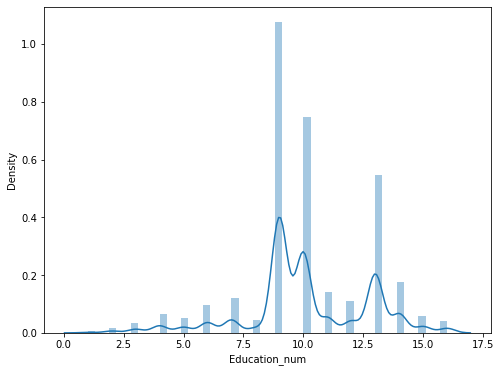

In [43]:
plt.figure(figsize=(8,6))
sns.distplot(df['Education_num'])
plt.show()

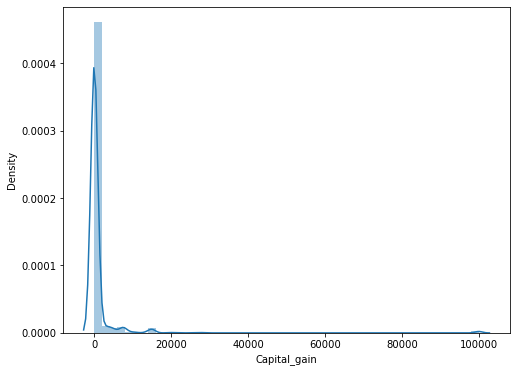

In [44]:
plt.figure(figsize=(8,6))
sns.distplot(df['Capital_gain'])
plt.show()

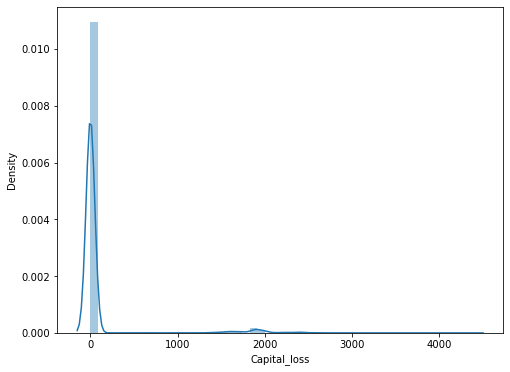

In [45]:
plt.figure(figsize=(8,6))
sns.distplot(df['Capital_loss'])
plt.show()

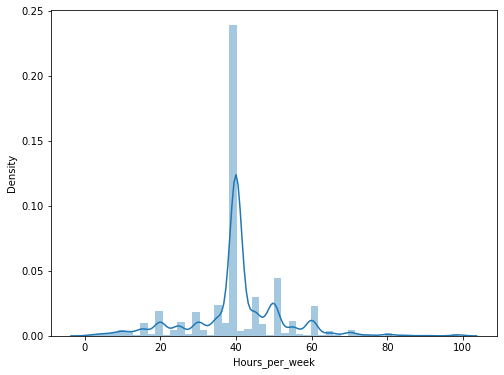

In [46]:
plt.figure(figsize=(8,6))
sns.distplot(df['Hours_per_week'])
plt.show()

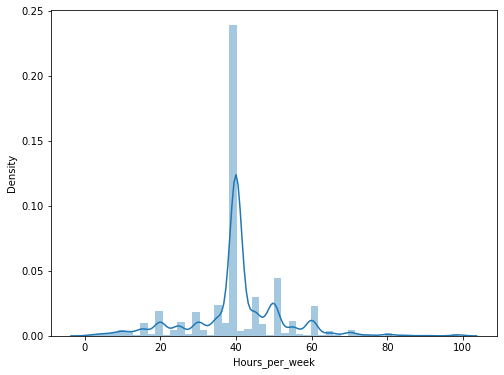

In [47]:
plt.figure(figsize=(8,6))
sns.distplot(df['Hours_per_week'])
plt.show()

In [48]:
#Replacing the classes with 0 and 1
df['Income']=df['Income'].replace({' <=50K': 0,' >50K': 1})

In [49]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


# Correlation:

In [50]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


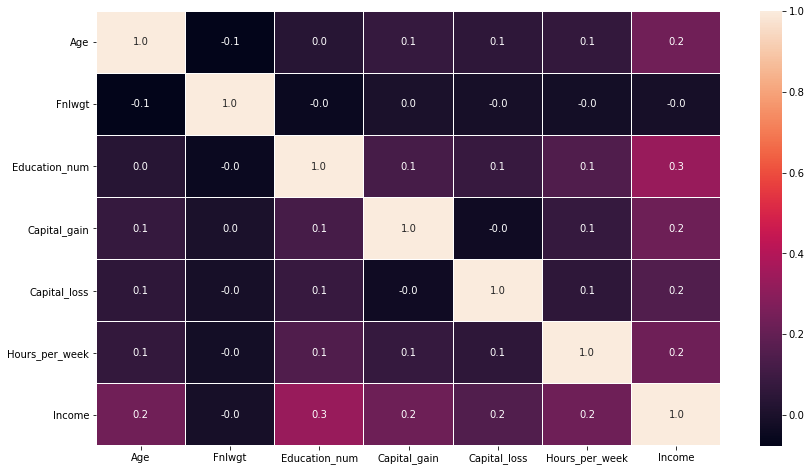

In [51]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# 'Income' vs Numerical Data Columns

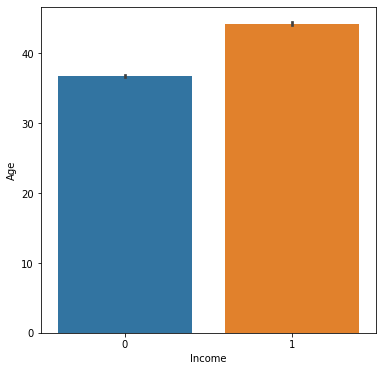

In [52]:
plt.figure(figsize=(6,6))
sns.barplot(x="Income", y="Age", data=df)
plt.show()

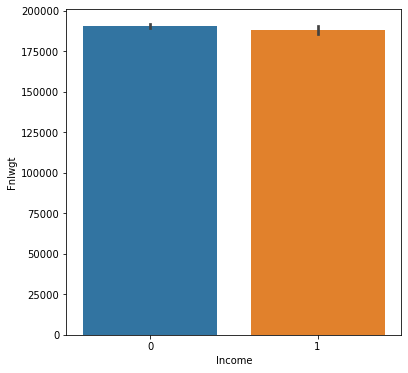

In [53]:
plt.figure(figsize=(6,6))
sns.barplot(x="Income", y="Fnlwgt", data=df)
plt.show()

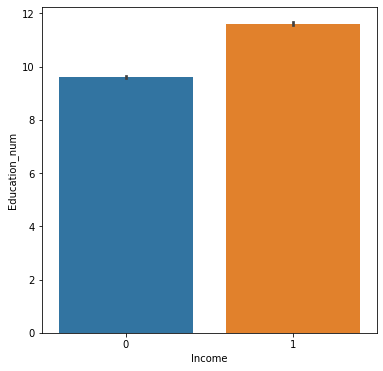

In [54]:
plt.figure(figsize=(6,6))
sns.barplot(x="Income", y="Education_num", data=df)
plt.show()

Higher Education_num contributes to higher income >50k

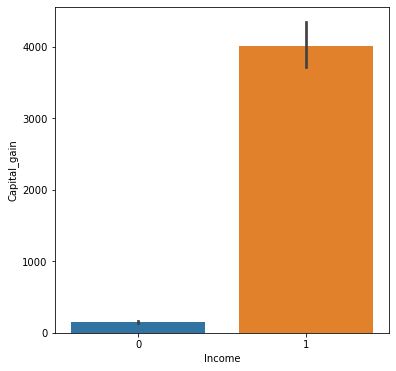

In [55]:
plt.figure(figsize=(6,6))
sns.barplot(x="Income", y="Capital_gain", data=df)
plt.show()

Higher Capital Gain and Higher Capital Loss contribute to higher income >50k

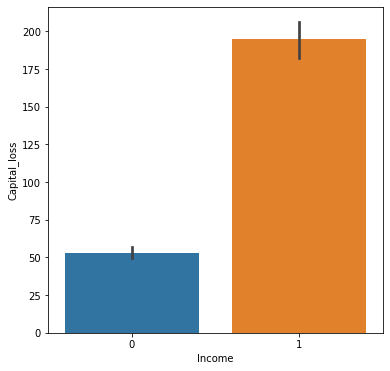

In [56]:
plt.figure(figsize=(6,6))
sns.barplot(x="Income", y="Capital_loss", data=df)
plt.show()

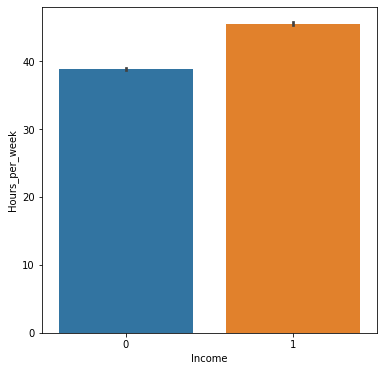

In [57]:
plt.figure(figsize=(6,6))
sns.barplot(x="Income", y="Hours_per_week", data=df)
plt.show()

People who work greater than 40 hours per week earn >50k

# Income' vs Categorical Data Columns

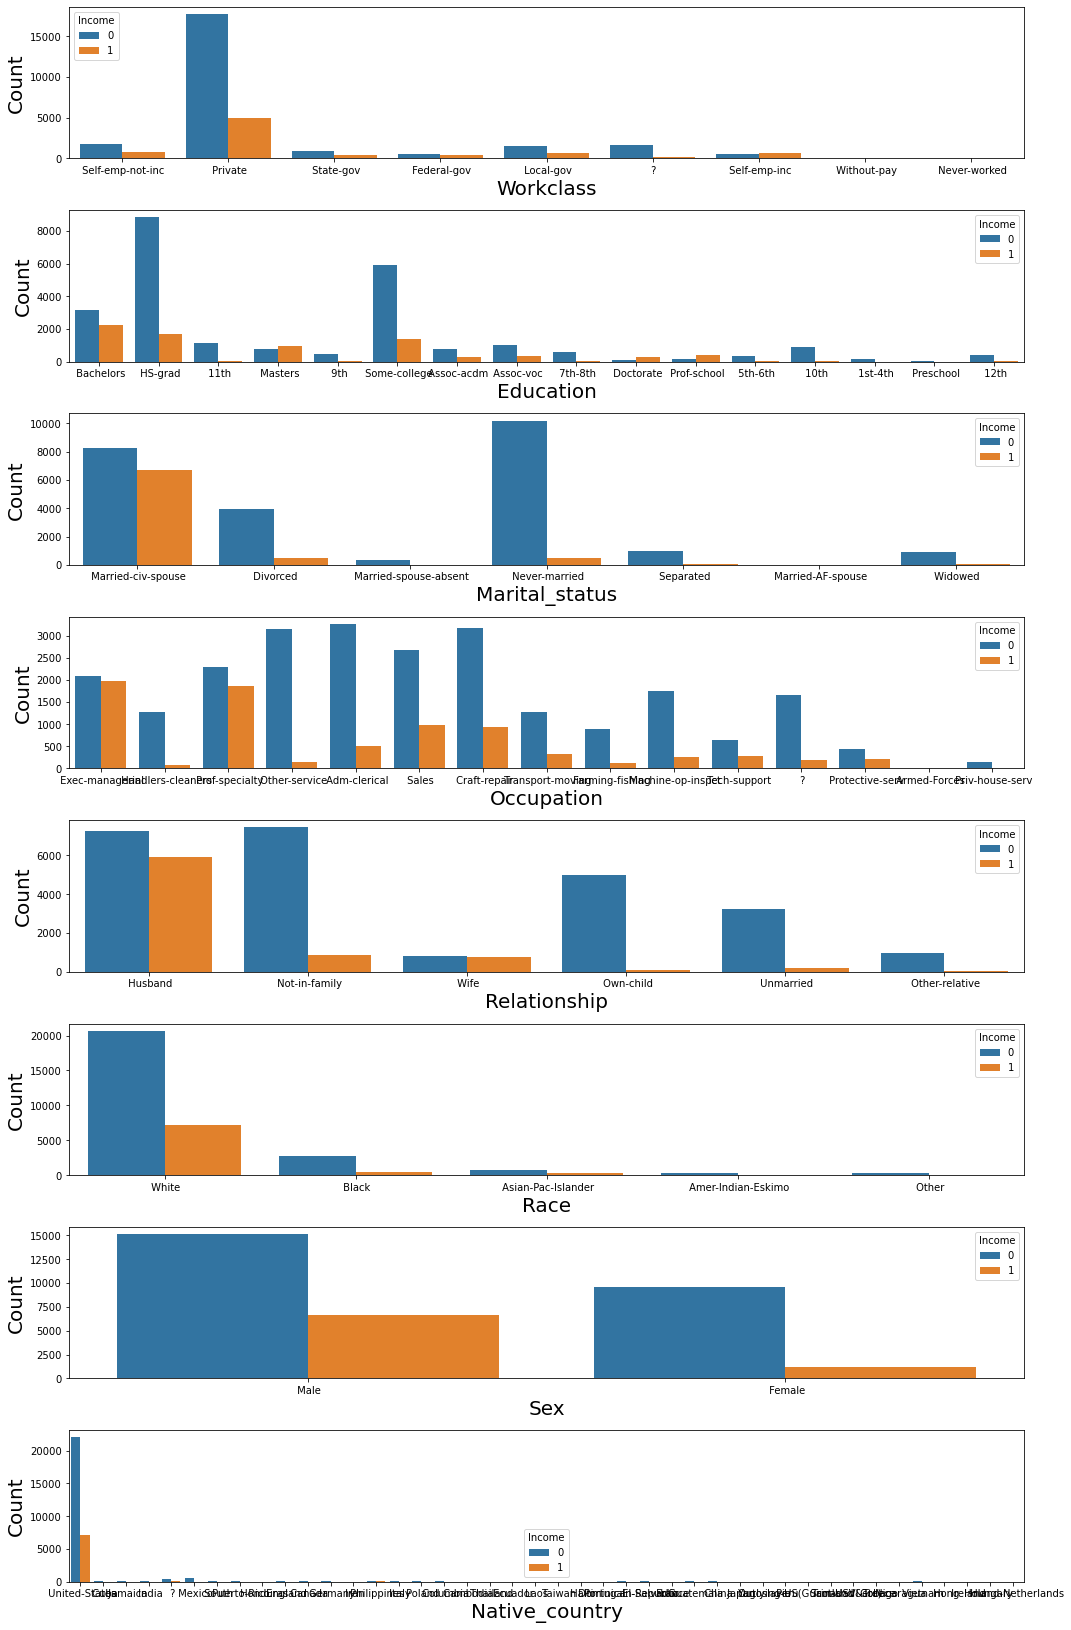

In [58]:
plt.figure(figsize=(15,25),)
plotnum=1
y = df['Income']
X = df[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']]
for col in X:
    if plotnum<=23:
        plt.subplot(9,1,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

# checking for Outliers:

In [59]:
X = df.drop(columns = ['Income'])
y = df['Income']

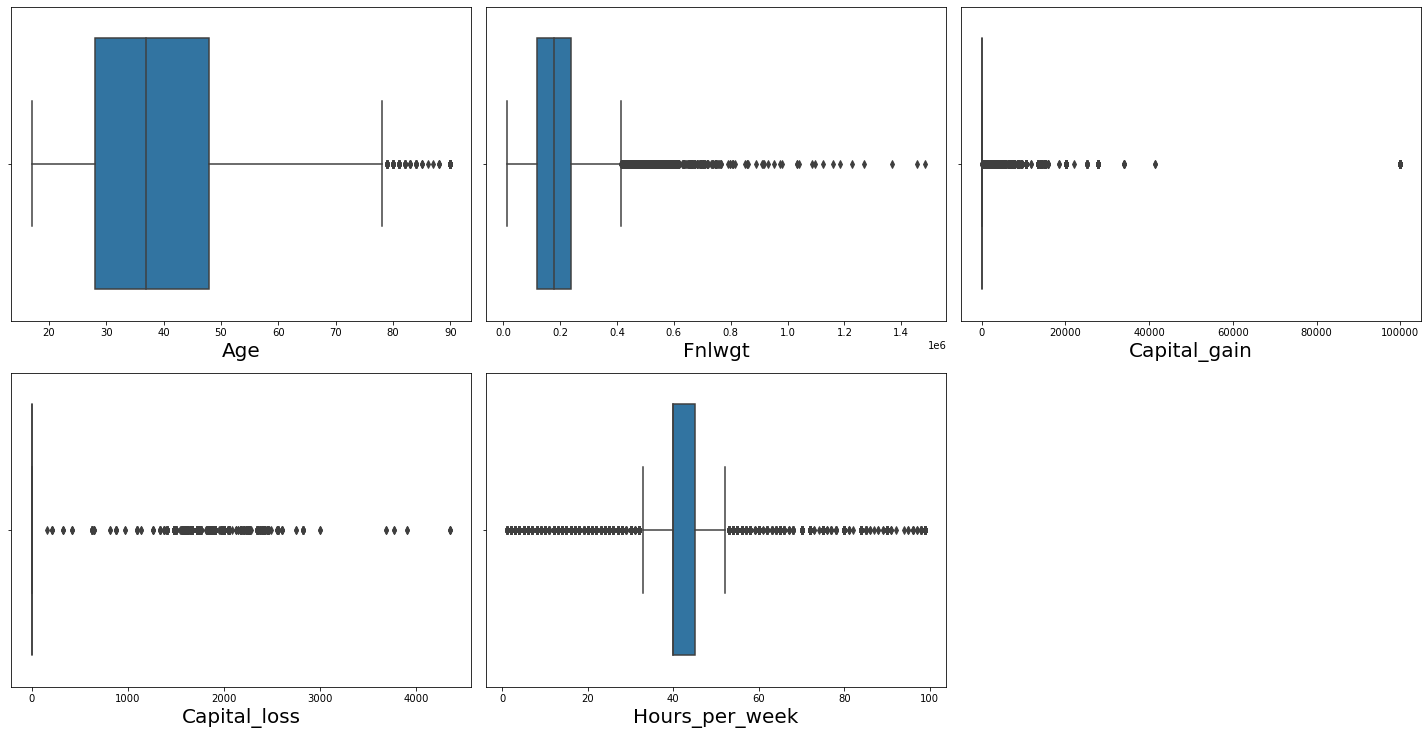

In [60]:
#Plotting the box plot to check the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in X[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### All columns have a lot of outliers.

# Removing Outliers uding Zscore method:

In [61]:
from scipy.stats import zscore

In [62]:
df1 = X[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']].copy()

In [63]:
z = zscore(df1)

In [64]:
z_abs_score = np.abs(z)

In [65]:
df2 = df1[(z_abs_score < 3).all(axis=1)]

In [66]:
df2.shape

(30028, 5)

In [67]:
df1.shape

(32560, 5)

# Percentage of Dataloss:

In [68]:
data_loss = (32560-30028)/32560*100
data_loss

7.776412776412776

#### 7.77% data loss is acceptable

In [69]:
dropindx = X.index.difference(df2.index)

In [70]:
df.drop(dropindx,inplace = True) #dropping the outlier Dataframe

In [71]:
df.shape

(30028, 15)

# Skewness:

In [72]:
X = df.drop(columns = ['Income'])
y = df['Income']

In [73]:
X.skew()

Age                0.489206
Fnlwgt             0.633615
Education_num     -0.324321
Capital_gain       4.957931
Capital_loss      29.761341
Hours_per_week    -0.350891
dtype: float64

### The skewness present in the columns 'Fnlwgt','Capital_gain','Capital_loss'

# Removing Skewness using yeo-johnson method

In [76]:
skwd = X[['Fnlwgt','Capital_gain','Capital_loss']]

In [77]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [80]:
transformed = scaler.fit_transform(skwd)

In [81]:
transformed = pd.DataFrame(transformed, columns=skwd.columns)

In [82]:
transformed.skew()

Fnlwgt          -0.034890
Capital_gain     3.082525
Capital_loss    24.952898
dtype: float64

In [83]:
transformed.index = df.index

In [84]:
df[['Fnlwgt','Capital_gain','Capital_loss']]=transformed[['Fnlwgt','Capital_gain','Capital_loss']]

In [85]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,-1.116219,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.296001,-0.040013,13,United-States,0
1,38,Private,0.422177,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.296001,-0.040013,40,United-States,0
2,53,Private,0.601968,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.296001,-0.040013,40,United-States,0
3,28,Private,1.480733,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.296001,-0.040013,40,Cuba,0
4,37,Private,1.042787,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.296001,-0.040013,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,0.806409,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,-0.296001,-0.040013,38,United-States,0
32556,40,Private,-0.211195,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.296001,-0.040013,40,United-States,1
32557,58,Private,-0.238870,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,-0.296001,-0.040013,40,United-States,0
32558,22,Private,0.284022,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,-0.296001,-0.040013,20,United-States,0


# Label Encoding:

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
le = LabelEncoder()

In [88]:
encode_data = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex']
for x in encode_data:
    df[x] = le.fit_transform(df[x])

In [89]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,-1.116219,9,13,2,4,0,4,1,-0.296001,-0.040013,13,United-States,0
1,38,4,0.422177,11,9,0,6,1,4,1,-0.296001,-0.040013,40,United-States,0
2,53,4,0.601968,1,7,2,6,0,2,1,-0.296001,-0.040013,40,United-States,0
3,28,4,1.480733,9,13,2,10,5,2,0,-0.296001,-0.040013,40,Cuba,0
4,37,4,1.042787,12,14,2,4,5,4,0,-0.296001,-0.040013,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,0.806409,7,12,2,13,5,4,0,-0.296001,-0.040013,38,United-States,0
32556,40,4,-0.211195,11,9,2,7,0,4,1,-0.296001,-0.040013,40,United-States,1
32557,58,4,-0.238870,11,9,6,1,4,4,0,-0.296001,-0.040013,40,United-States,0
32558,22,4,0.284022,11,9,4,1,3,4,1,-0.296001,-0.040013,20,United-States,0


In [90]:
#dummies
data = pd.get_dummies(df['Native_country'],drop_first=False)
data

,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [91]:
df=pd.concat([df,data],axis=1)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,50,6,-1.116219,9,13,2,4,0,4,1,...,0,0,0,0,0,0,0,1,0,0
1,38,4,0.422177,11,9,0,6,1,4,1,...,0,0,0,0,0,0,0,1,0,0
2,53,4,0.601968,1,7,2,6,0,2,1,...,0,0,0,0,0,0,0,1,0,0
3,28,4,1.480733,9,13,2,10,5,2,0,...,0,0,0,0,0,0,0,0,0,0
4,37,4,1.042787,12,14,2,4,5,4,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,0.806409,7,12,2,13,5,4,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,4,-0.211195,11,9,2,7,0,4,1,...,0,0,0,0,0,0,0,1,0,0
32557,58,4,-0.238870,11,9,6,1,4,4,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,4,0.284022,11,9,4,1,3,4,1,...,0,0,0,0,0,0,0,1,0,0


In [92]:
#droping Native country column
df=df.drop(columns=['Native_country'],axis=1)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,50,6,-1.116219,9,13,2,4,0,4,1,...,0,0,0,0,0,0,0,1,0,0
1,38,4,0.422177,11,9,0,6,1,4,1,...,0,0,0,0,0,0,0,1,0,0
2,53,4,0.601968,1,7,2,6,0,2,1,...,0,0,0,0,0,0,0,1,0,0
3,28,4,1.480733,9,13,2,10,5,2,0,...,0,0,0,0,0,0,0,0,0,0
4,37,4,1.042787,12,14,2,4,5,4,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,0.806409,7,12,2,13,5,4,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,4,-0.211195,11,9,2,7,0,4,1,...,0,0,0,0,0,0,0,1,0,0
32557,58,4,-0.238870,11,9,6,1,4,4,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,4,0.284022,11,9,4,1,3,4,1,...,0,0,0,0,0,0,0,1,0,0


# Scaling Data:

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
X = df.drop(columns = ['Income'])
y = df['Income']

In [95]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

# Principle Component Analysis

In [96]:
from sklearn.decomposition import PCA

In [97]:
pca = PCA()

In [99]:
component = pca.fit_transform(scaled_X)

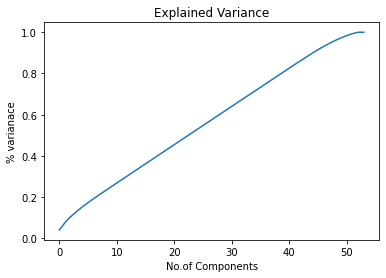

In [100]:
#visualzise
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No.of Components')
plt.ylabel('% varianace')
plt.title('Explained Variance')
plt.show()

In [103]:
final = PCA(n_components=11)
final_data = final.fit_transform(scaled_X)
pca_data = pd.DataFrame(final_data)
pca_data

,0,1,2,3,4,5,6,7,8,9,10
0,-1.006306,-0.109767,0.101979,0.235788,-0.171134,0.813790,-0.325805,0.176325,0.336636,0.341931,0.089575
1,-1.039533,0.253946,-0.559312,0.436167,-0.098926,-0.204858,0.168943,0.048459,-0.118271,0.005769,0.063535
2,0.062402,1.102031,-1.288023,1.118942,-1.853868,0.313165,0.297264,0.102262,-0.098639,0.205531,0.111438
3,3.810049,2.085523,0.560779,-0.948803,5.459466,0.443808,8.097729,0.915929,0.446629,0.066423,1.293637
4,0.584788,-1.735899,1.024435,-0.084578,1.166443,-0.403138,0.695758,-0.197564,-0.184562,-0.139689,0.109873
...,...,...,...,...,...,...,...,...,...,...,...
30023,0.951091,-1.542875,0.281898,-1.360341,0.221347,0.531936,0.676459,-0.035298,-0.139778,0.028714,0.011310
30024,-1.034792,0.266207,-0.506394,0.129245,-0.310626,-0.023669,-0.227314,0.146019,0.033407,0.029811,0.003136
30025,1.197953,-1.732369,0.015167,0.693932,0.679805,0.315480,0.032301,-0.200265,0.057716,-0.048807,0.079798
30026,1.094608,-1.457508,-0.562660,-0.117382,-0.150123,-0.663069,-0.381956,0.056036,0.213728,0.150227,0.001837


# Model Building:

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import caccuracy_score,roc_curve
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import train_test_split

# Spliting Data:

In [104]:
X_train,X_test,y_train,y_test = train_test_split(pca_data,y,test_size=.25,random_state=500)

## Logistic Regression

In [106]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [108]:
lr.score(X_train,y_train)

0.8126193330669154

In [109]:
pred_lr = lr.predict(X_test)

In [110]:
accuracy_score(y_test,pred_lr)

0.8108432130011989

## Decision Tree Classifier:

In [111]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [112]:
dtc.score(X_train,y_train)

0.9999555969983571

In [115]:
pred_dtc = dtc.predict(X_test)

In [116]:
accuracy_score(y_test,pred_dtc)

0.7696816304782204

## Random Forest Classifier:

In [117]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [118]:
rf.score(X_train,y_train)

0.9998223879934284

In [119]:
pred_rf = rf.predict(X_test)

In [120]:
accuracy_score(y_test,pred_rf)

0.8249633675236446

## KNeighbors Classifier:

In [121]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [122]:
knn.score(X_train,y_train)

0.8753163713867057

In [123]:
pred_knn = knn.predict(X_test)

In [124]:
accuracy_score(y_test,pred_knn)

0.8144398561342747

## Support Vector Classifier:

In [125]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [126]:
svm.score(X_train,y_train)

0.8304249367257227

In [127]:
pred_svm = svm.predict(X_test)

In [128]:
accuracy_score(y_test,pred_svm)

0.8196350073264953

# Cross Valiadation:

#### logisticRegression:

In [129]:
print(cross_val_score(lr,pca_data,y,cv=5).mean())

0.8120756678791651


#### Decision Tree Classifier:

In [130]:
print(cross_val_score(dtc,pca_data,y,cv=5).mean())

0.7737777737111624


#### Random Forest Classifier

In [131]:
print(cross_val_score(rf,pca_data,y,cv=5).mean())

0.8289264440804824


#### KNeighbors Classifier:

In [132]:
print(cross_val_score(knn,pca_data,y,cv=5).mean())

0.8183030846477974


#### Support Vector Classifier:

In [133]:
print(cross_val_score(svm,pca_data,y,cv=5).mean())

0.8249301073614147


# From Accuracy score and Cross Validation score we can conclude that RandomForestClassifier as our best fitting model.

# Hyper Parameter Tuning:

### RandomForestClassifier

In [136]:
RFC = RandomForestClassifier()

In [137]:
parametrs = {'max_depth':[6,7,8],'max_features':['auto','sqrt'],'n_estimators':[200,300],'criterion' :['gini','entropy']}

In [138]:
rfc = GridSearchCV(RFC, parametrs, cv=5)

In [139]:
rfc.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

In [140]:
rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [142]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred_rf = model.predict(X_test)
acc = accuracy_score(y_test,pred_rf)
print(acc*100)

82.2832023444785


# Saving 

In [144]:
import joblib
joblib.dump(model,'censusincome.pkl')

['censusincome.pkl']

# !!!!!!! THANK YOU !!!!!!!